# Disease prediction 

In [197]:
# Importing standard packages

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [198]:
# Importing the dataset

path = "../data/"
file_name = "cardio_train.csv"

df = pd.read_csv(path + file_name, sep=";")
df.head()


,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [199]:
# Basic info check on df

df.info()
df.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   gender       70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


id             0
age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64

## Plotting some relevant graphs and doing some warmup EDA
- To familiarize myself with the dataset and what I'll be working with.

[Text(0.5, 1.0, 'Cardiovascular Disease'),
 Text(0.5, 0, '0 = Healthy     1 = Diagnosed with CD'),
 Text(0, 0.5, 'Count')]

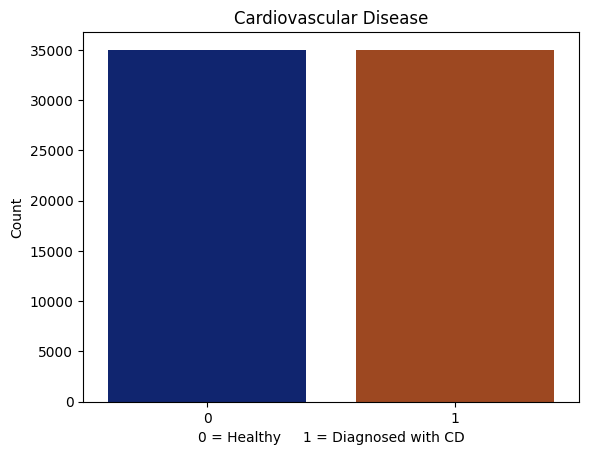

In [200]:
# Finding out how many people have cardiovascular disease and how many don't

ax = sns.countplot(x="cardio", data=df, palette="dark")


ax.set(title="Cardiovascular Disease", xlabel="0 = Healthy     1 = Diagnosed with CD", ylabel="Count")



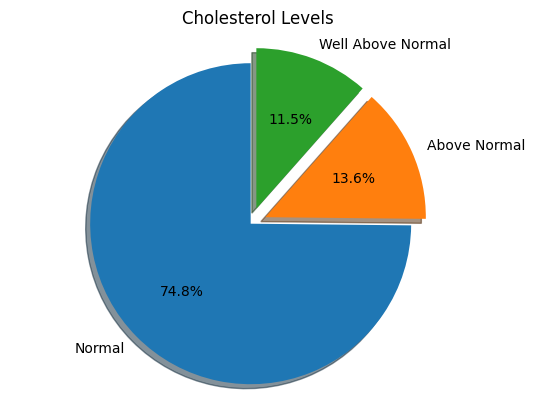

In [201]:
# Visualising cholesterol levels with a pie chart

labels = ["Normal", "Above Normal", "Well Above Normal"]
sizes = df["cholesterol"].value_counts()
explode = (0, 0.1, 0.1)

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct="%1.1f%%", shadow=True, startangle=90)
ax1.axis("equal")
plt.title("Cholesterol Levels")
plt.show()


In [202]:
# Converting age from days to years

df["age"] = df["age"] / 365
df["age"] = df["age"].astype("int")
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,50,2,168,62.0,110,80,1,1,0,0,1,0
1,1,55,1,156,85.0,140,90,3,1,0,0,1,1
2,2,51,1,165,64.0,130,70,3,1,0,0,0,1
3,3,48,2,169,82.0,150,100,1,1,0,0,1,1
4,4,47,1,156,56.0,100,60,1,1,0,0,0,0


[Text(0.5, 1.0, 'Age Distribution'),
 Text(0.5, 0, 'Age'),
 Text(0, 0.5, 'Count')]

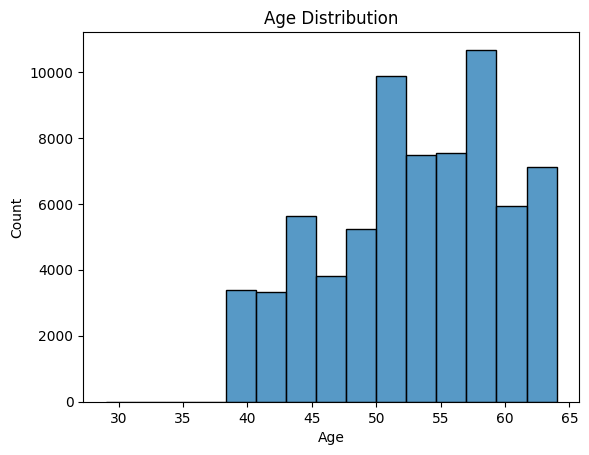

In [203]:
# Plotting histogram of age

ax = sns.histplot(df["age"], bins=15)
ax.set(title="Age Distribution", xlabel="Age", ylabel="Count")

# Change y label to %

Percentage of men that smoke in the dataset: 86.82%


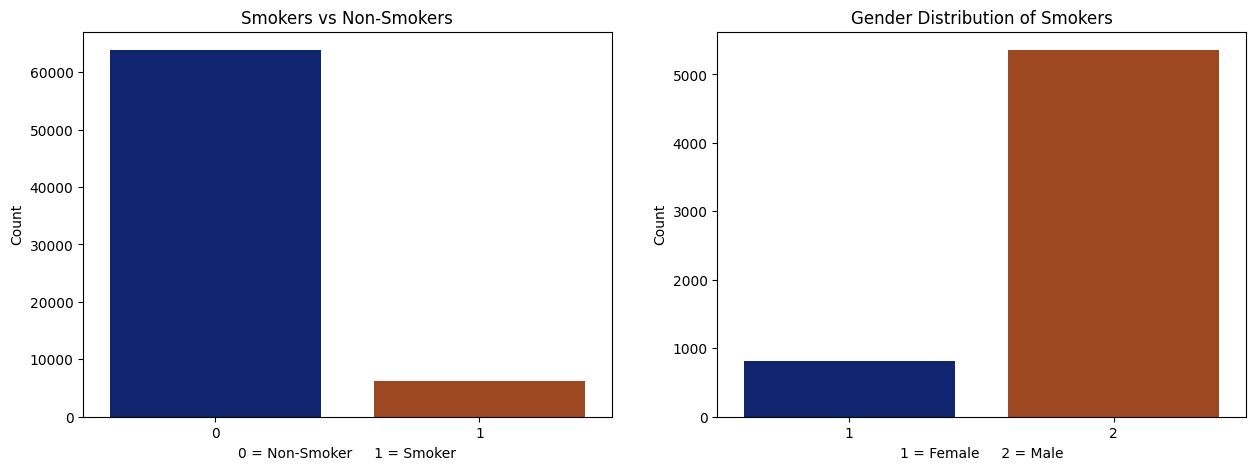

In [204]:
# Showing how many are smokers and non smokers, and subplot with how many are men and women

fig, ax = plt.subplots(1, 2, figsize=(15, 5))
sns.countplot(x="smoke", data=df, palette="dark", ax=ax[0])
ax[0].set_title("Smokers vs Non-Smokers")
ax[0].set_xlabel("0 = Non-Smoker     1 = Smoker")
ax[0].set_ylabel("Count")

# Creating the second plot showing the gender distribution between smokers
# finding out what gender smokes the most

df_smokers = df[df["smoke"] == 1]

sns.countplot(x="gender", data=df_smokers, palette="dark", ax=ax[1])
ax[1].set_title("Gender Distribution of Smokers")
ax[1].set_xlabel("1 = Female     2 = Male")
ax[1].set_ylabel("Count")

# calculating the percentage of smokers in the dataset
smoking_women = df_smokers[df_smokers["gender"]==1].value_counts().sum()
smoking_men = df_smokers[df_smokers["gender"]==2].value_counts().sum()
smokers_percentage = smoking_men / (smoking_women + smoking_men) * 100
print("Percentage of men that smoke in the dataset: {:.2f}%".format(smokers_percentage))

### Interesting to see that a 86.84% of the smokers in the dataset are men.

[Text(0.5, 1.0, 'Weight Distribution'),
 Text(0.5, 0, 'Weight'),
 Text(0, 0.5, 'Count')]

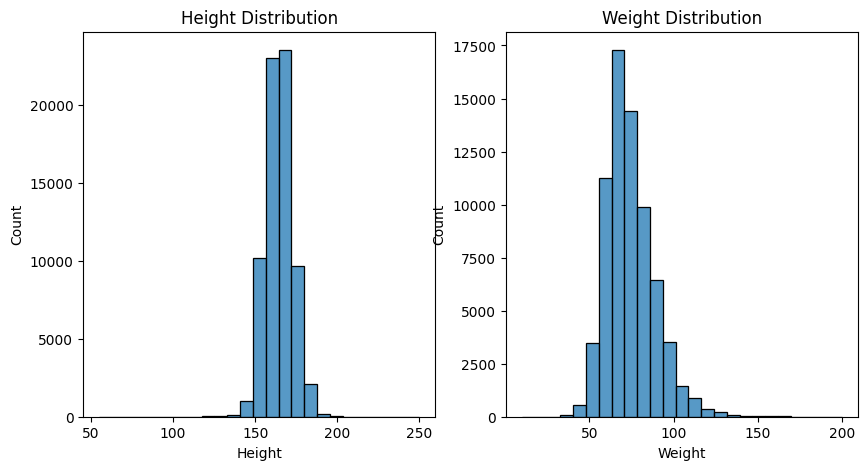

In [205]:
# Visualising weight, height distribution in subplots

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
sns.histplot(df["height"], bins=25, ax=ax1)
sns.histplot(df["weight"], bins=25, ax=ax2)
ax1.set(title="Height Distribution", xlabel="Height", ylabel="Count")
ax2.set(title="Weight Distribution", xlabel="Weight", ylabel="Count")


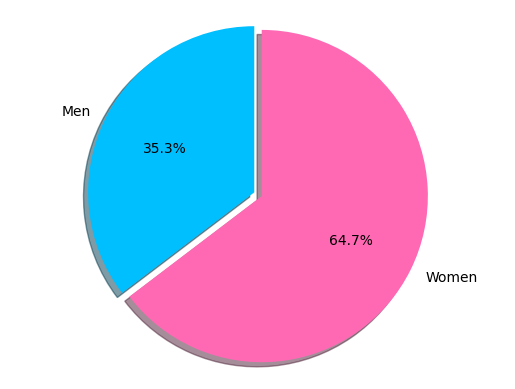

In [206]:
# creating two new dataframes containing the men and women who have cardiovascular disease

df_men_cardio_disease = df[(df["gender"] == 2) & (df["cardio"] == 1)]
df_women_cardio_disease = df[(df["gender"] == 1) & (df["cardio"] == 1)]

# plotting the distribution between men and women with a pie chart

labels = ["Men", "Women"]
data = [len(df_men_cardio_disease), len(df_women_cardio_disease)]
explode = (0, 0.05) # Separating the pie parts from each other for easier viewing

fig1, ax1 = plt.subplots()
ax1.pie(data, explode=explode, labels=labels, autopct="%1.1f%%", shadow=True, startangle=90, colors=["#00bfff", "#ff69b4"])
ax1.axis("equal")
plt.show()





## Feature Engineering BMI and Blood Pressure

[Text(0.5, 1.0, 'BMI Distribution'),
 Text(0.5, 0, 'BMI'),
 Text(0, 0.5, 'Count')]

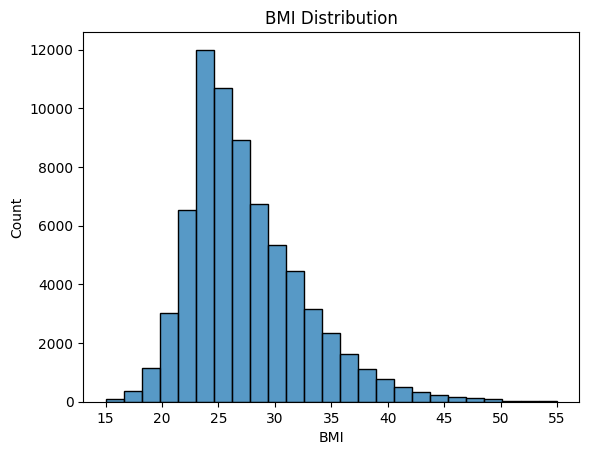

In [207]:
# Creating a new column for the BMI

df["bmi"] = round(df["weight"] / ((df["height"] / 100) ** 2), 2)

# checking for bmi outliers

df_bmi_outliers = df[(df["bmi"] < 15) | (df["bmi"] > 55)]

# removing the outliers using the df_bmi_outliers dataframe

df = df.drop(df_bmi_outliers.index)

# plotting the distribution of bmi

ax = sns.histplot(df["bmi"], bins=25)
ax.set(title="BMI Distribution", xlabel="BMI", ylabel="Count")





### I chose to set the outliers at < 15 and 55 > due to this article
https://www.cdc.gov/obesity/basics/adult-defining.html  
Having a bmi below 15 or above 55 is very uncommon and extremely dangerous so I chose to remove those outliers.

# 

In [208]:
# Creating a bmi feature for with the following categories: normal range, overweight, obese (class 1), obese (class 2), obese (class 3)

def bmi_category(bmi):
    if bmi < 18.5:
        return "Underweight"
    if bmi < 25:
        return "Normal"
    if bmi < 30:
        return "Overweight"
    if bmi < 35:
        return "Obese Class 1"
    if bmi < 40:
        return "Obese Class 2"
    else:
        return "Obese Class 3"

# creating a new column for the bmi category

df["bmi_category"] = df["bmi"].apply(bmi_category) # applying the bmi_category function to the bmi column



In [209]:
# Feature engineering blood pressure

# creating a new column for the blood pressure category
# Categories: Healthy, Elevated, Stage 1 Hypertension, Stage 2 Hypertension, Hypertensive Crisis

def blood_pressure_category(systolic, diastolic):
    if systolic < 120 and diastolic < 80:
        return "Healthy"
    if systolic < 130 and diastolic < 80:
        return "Elevated"
    if systolic < 140 or diastolic < 90:
        return "Stage 1 Hypertension"
    if systolic < 180 or diastolic < 120:
        return "Stage 2 Hypertension"
    else:
        return "Hypertensive Crisis"

df["blood_pressure_category"] = df.apply(lambda x: blood_pressure_category(x["ap_hi"], x["ap_lo"]), axis=1)

df.head()


,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,bmi,bmi_category,blood_pressure_category
0,0,50,2,168,62.0,110,80,1,1,0,0,1,0,21.97,Normal,Stage 1 Hypertension
1,1,55,1,156,85.0,140,90,3,1,0,0,1,1,34.93,Obese Class 1,Stage 2 Hypertension
2,2,51,1,165,64.0,130,70,3,1,0,0,0,1,23.51,Normal,Stage 1 Hypertension
3,3,48,2,169,82.0,150,100,1,1,0,0,1,1,28.71,Overweight,Stage 2 Hypertension
4,4,47,1,156,56.0,100,60,1,1,0,0,0,0,23.01,Normal,Healthy


### Blood pressure outliers found from following website

https://www.bloodpressureuk.org/your-blood-pressure/understanding-your-blood-pressure/what-do-the-numbers-mean/
- The numbers I chose are from their graph. Though I did be a bit more generous due to blood pressure being able to spike to very high and low values during e.g a traumatic event. And we do not know where this data was collected so I thought it was best to be a bit more lenient 

In [210]:
# Removing blood pressure outliers

df_blood_pressure_outliers = df[(df["ap_hi"] < 50) | (df["ap_hi"] > 200) | (df["ap_lo"] < 40) | (df["ap_lo"] > 130)] # finding the outliers
df = df.drop(df_blood_pressure_outliers.index) # removing the outliers


In [211]:
# Finding height and weight outliers

df_height_outliers = df[(df["height"] < 100) | (df["height"] > 220)]


df_weight_outliers = df[(df["weight"] < 35) | (df["weight"] > 250)]
display(df_weight_outliers, df_height_outliers)

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,bmi,bmi_category,blood_pressure_category
3752,5306,42,1,120,30.0,110,70,1,1,0,0,1,0,20.83,Normal,Healthy
14722,21040,62,1,143,34.0,100,70,1,1,0,0,1,0,16.63,Underweight,Healthy
22016,31439,42,1,146,32.0,100,70,1,1,0,0,0,0,15.01,Underweight,Healthy
34276,48976,40,2,128,28.0,120,80,1,1,0,0,1,0,17.09,Underweight,Stage 1 Hypertension
35314,50443,54,1,146,32.0,130,80,1,2,0,0,0,0,15.01,Underweight,Stage 1 Hypertension
48080,68667,52,1,143,33.0,100,60,1,1,0,0,1,0,16.14,Underweight,Healthy
51837,73914,54,2,139,34.0,120,70,1,1,0,0,1,0,17.60,Underweight,Elevated


,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,bmi,bmi_category,blood_pressure_category


### Not many weight / height outliers after removing the BMI outliers.

C:\Users\Agam\AppData\Local\Temp\ipykernel_13832\4016068018.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, cmap="coolwarm")


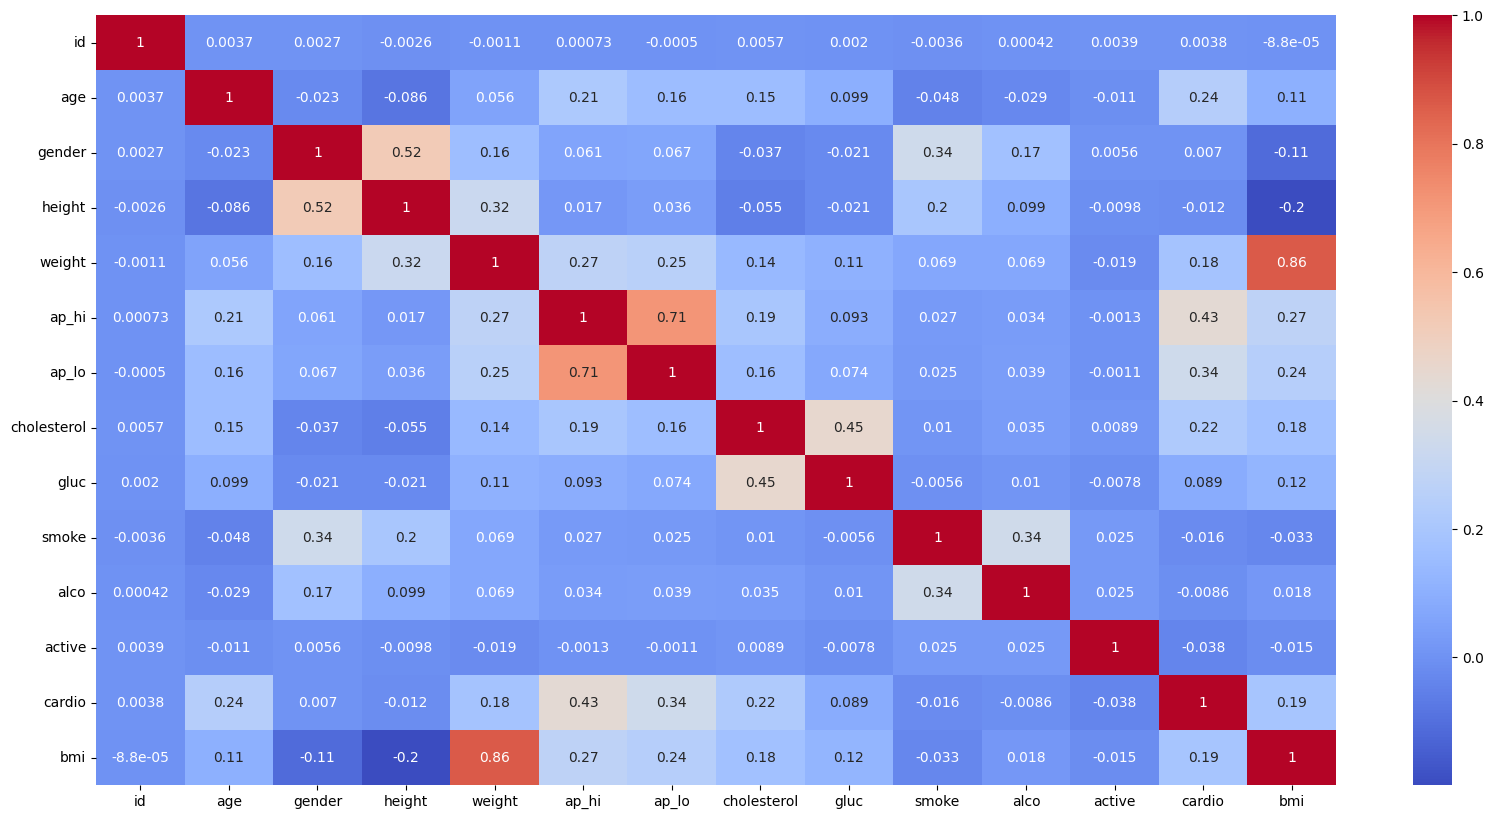

In [212]:
# Creating a heatmap to see the correlation between the features

plt.figure(figsize=(20, 10))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.show()

# Strong correlation between systolic blood pressure and diastolic blood pressure. This is expected.  We can remove one of the features.


In [213]:
# Printing out the correlation between the features and the target variable

df.corr(numeric_only=True)["cardio"].sort_values(ascending=False)


cardio         1.000000
ap_hi          0.429475
ap_lo          0.338512
age            0.239819
cholesterol    0.221418
bmi            0.192849
weight         0.181258
gluc           0.089251
gender         0.006965
id             0.003780
alco          -0.008621
height        -0.012000
smoke         -0.016414
active        -0.037557
Name: cardio, dtype: float64

## Correlations.

From the correlations there are no values that seem very relevant. 
The highest correlated values are Stocastic and Dialistic pressure, age and cholesterol. 
  
Negative correlations are height and bmi. mostly because height is divided by 100 to make the formula work. So really it is as correlated as weight. They should be the same.  
  
Height and gender are correlated as to be expected.  
As we found out earlier there is a shocking difference in gender when it comes to smoking. Which is also represented here.  

## Examining categories to learn more about the correlation between patients that have cardiovascular disease

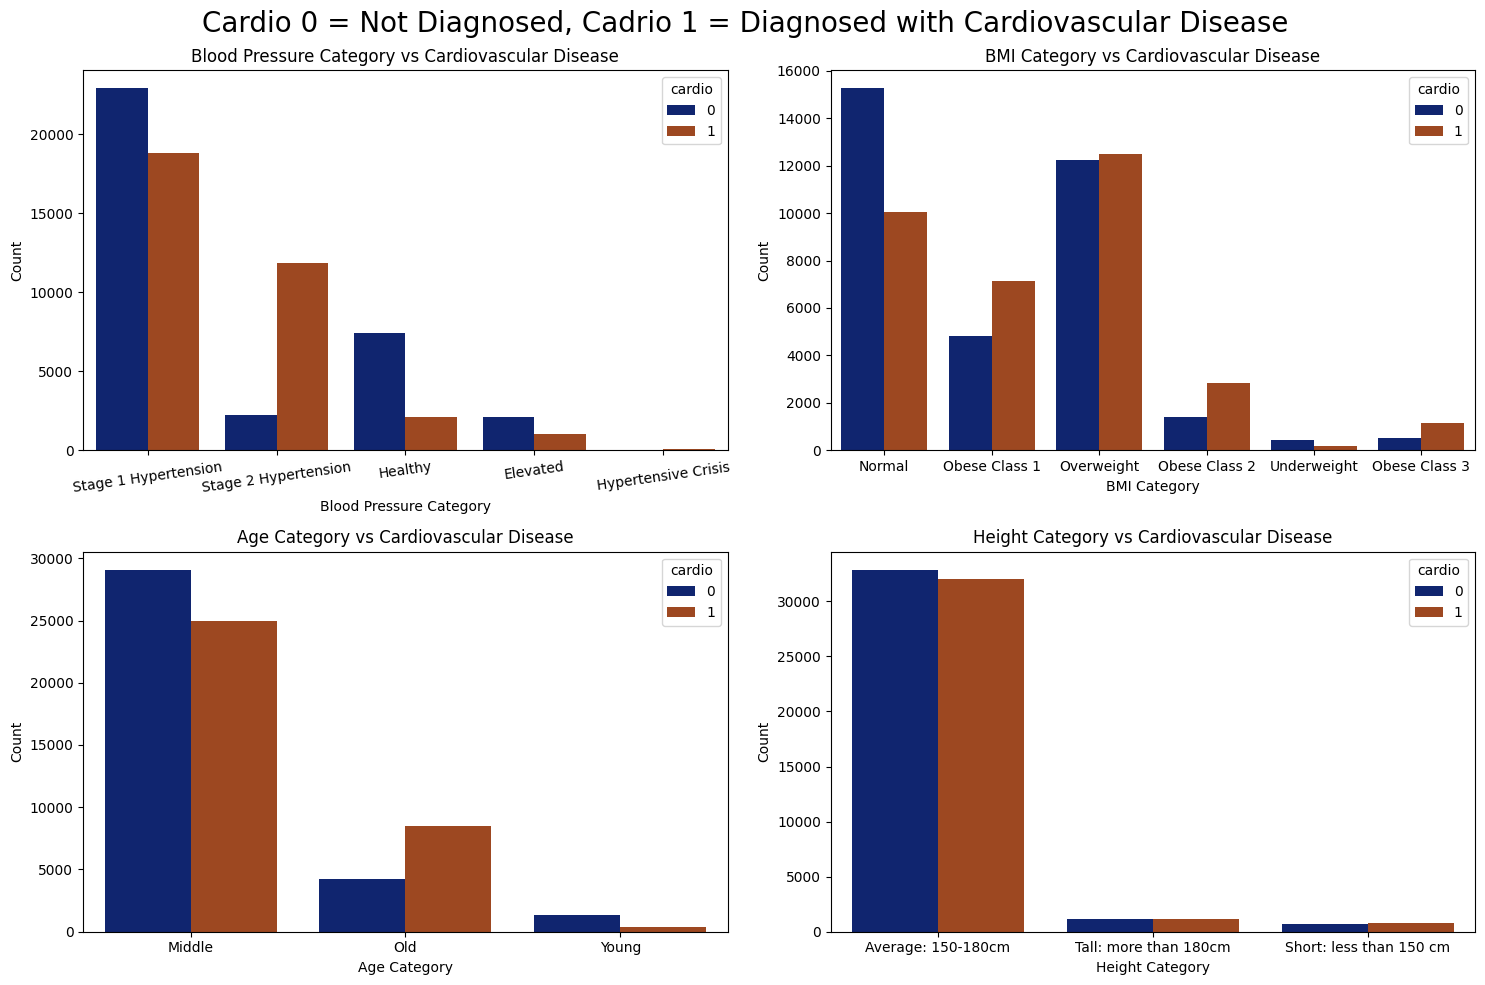

In [214]:
# Creating two subplots for the cardivascular disease and blood pressure category and the cardivascular disease and bmi category

fig, ax = plt.subplots(2, 2, figsize=(15, 10))

# Creating a count plot showing blood pressure category vs cardiovascular disease and without cardiovascular disease

ax[0,0] = sns.countplot(x="blood_pressure_category", hue="cardio", data=df, palette="dark", ax=ax[0,0])
ax[0,0].set(title="Blood Pressure Category vs Cardiovascular Disease", xlabel="Blood Pressure Category", ylabel="Count")
# skewing the x labels
ax[0,0].set_xticklabels(ax[0,0].get_xticklabels(), rotation=8, ha="center")

# Creating a count plot showing bmi category vs cardiovascular disease and without cardiovascular disease

ax[0,1] = sns.countplot(x="bmi_category", hue="cardio", data=df, palette="dark", ax=ax[0,1])
ax[0,1].set(title="BMI Category vs Cardiovascular Disease", xlabel="BMI Category", ylabel="Count")

# Creating a count plot showing younger people vs older people vs cardiovascular disease and without cardiovascular disease

# creating a new dataframe with the age categories

df_age = df.copy()
df_age["age"] = df_age["age"].apply(lambda x: "Young" if x < 40 else "Middle" if x < 60 else "Old")

ax[1,0] = sns.countplot(x="age", hue="cardio", data=df_age, palette="dark", ax=ax[1,0])
ax[1,0].set(title="Age Category vs Cardiovascular Disease", xlabel="Age Category", ylabel="Count")

# Creating a similar count plot but with height vs cardiovascular disease and without cardiovascular disease

# creating a new dataframe with the height categories

df_height = df.copy()
df_height["height"] = df_height["height"].apply(lambda x: "Short: less than 150 cm" if x < 150 else "Average: 150-180cm" if x < 180 else "Tall: more than 180cm")

ax[1,1] = sns.countplot(x="height", hue="cardio", data=df_height, palette="dark", ax=ax[1,1])
ax[1,1].set(title="Height Category vs Cardiovascular Disease", xlabel="Height Category", ylabel="Count")

# Setting title for the whole figure
fig.suptitle("Cardio 0 = Not Diagnosed, Cadrio 1 = Diagnosed with Cardiovascular Disease", fontsize=20)

# Giving the graphs some more room
plt.tight_layout()


## Through these graphs we can see that the worst thing to be according to this data set is:
- Suffering from Stage 1 Hypertension  
- Being Overweight
- Middle aged
- and of average height.

### That is not likely to be the case though.
- The description above sounds like the average person, so it is not surprising that those values are over represented in the dataset

In [215]:
# Creating two new datasets.

df_copy = df

# Creating a new dataset with dropped features,
df_0 = df_copy.drop(["id","ap_hi", "ap_lo", "height", "weight", "bmi"], axis=1)
# Dummy encoding on df_0, Categories: blood pressure category, bmi category and gender
df_0_dummy = pd.get_dummies(df_0, columns=["blood_pressure_category", "bmi_category", "gender"], prefix=["blood_pressure_category","bmi_category", "gender"])

# Creating another new dataset with dropped features
df_1 = df_copy.drop(["id","bmi_category", "blood_pressure_category", "height", "weight"], axis=1)
# Dummy encoding on gender.
df_1_dummy = pd.get_dummies(df_1, columns=["gender"], prefix = ["gender"]) # get_dummies is Dummy encoding which is used to convert categorical data into numerical data


display(df_0.head(), df_1.head())

,age,gender,cholesterol,gluc,smoke,alco,active,cardio,bmi_category,blood_pressure_category
0,50,2,1,1,0,0,1,0,Normal,Stage 1 Hypertension
1,55,1,3,1,0,0,1,1,Obese Class 1,Stage 2 Hypertension
2,51,1,3,1,0,0,0,1,Normal,Stage 1 Hypertension
3,48,2,1,1,0,0,1,1,Overweight,Stage 2 Hypertension
4,47,1,1,1,0,0,0,0,Normal,Healthy


,age,gender,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,bmi
0,50,2,110,80,1,1,0,0,1,0,21.97
1,55,1,140,90,3,1,0,0,1,1,34.93
2,51,1,130,70,3,1,0,0,0,1,23.51
3,48,2,150,100,1,1,0,0,1,1,28.71
4,47,1,100,60,1,1,0,0,0,0,23.01


In [216]:
# Saving csv files from df_0 and df_1

# saving the csv file

df_0_dummy.to_csv("../Data/df_0_with_dummy_encoding.csv")
df_1_dummy.to_csv("../Data/df_1_with_dummy_encoding.csv")

## With the EDA and feature engineering done we move on to choosing and training a model.
- Lab continues in the file named **Lab_2_Model_Selection.ipynb**
